In [171]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests as req
from bs4 import BeautifulSoup
import json, requests

In [172]:
def html_treatment(money:str) -> float:
    '''Formats money in reais to a float.'''
    return float(money.replace(',','.').replace('\n',''))

#Passo 1: Extraindo HTML de uma página da web.

In [173]:
webpage = "https://www.dieese.org.br/analiseicv/tarifasPublicas.html"
font_code = req.get(webpage).text
soup = BeautifulSoup(font_code, 'html.parser')

#Passo 2: Direcionando elementos de interesse dentro do HTML.

In [174]:
header = ['Data','Luz residencial até 300kW','Água residencial até 10mt3','Gás até 15mt3','Ultragás','Liquigás','Copagás','Ônibus Municipal']

In [175]:
dados = []
for rows in soup.tbody.find_all('tr'):
    if len(array:=rows.find_all('td')) > 1:
        dummy_array = [dados.text for dados in array]
        dummy_array[1] = html_treatment(dummy_array[1])
        dummy_array[2] = html_treatment(dummy_array[2])
        dummy_array[3] = html_treatment(dummy_array[3])
        dummy_array[4] = html_treatment(dummy_array[4])
        dummy_array[5] = html_treatment(dummy_array[5])
        dummy_array[6] = html_treatment(dummy_array[6])
        dummy_array[7] = html_treatment(dummy_array[7])        
        dados.append(dummy_array)
    else:
        print("tables > 1")

#Passo 3: Armazenar os dados dentro de um DataFrame.

In [176]:
tarifas_publicas = pd.DataFrame(dados, columns=header)
tarifas_publicas

,Data,Luz residencial até 300kW,Água residencial até 10mt3,Gás até 15mt3,Ultragás,Liquigás,Copagás,Ônibus Municipal
0,Fev/2020\n,154.68,26.18,63.65,90.00,80.00,78.00,4.40
1,Jan/2020\n,155.49,26.18,63.65,90.00,80.00,78.00,4.40
2,Dez/2019\n,155.49,26.18,63.65,94.90,80.00,78.00,4.30
3,Nov/2019\n,157.08,26.18,63.65,94.90,80.00,78.00,4.30
4,Out/2019\n,155.58,26.18,63.65,94.90,80.00,75.00,4.30
...,...,...,...,...,...,...,...,...
249,Mai/1999\n\t\t\t\t\t\t\t\t,39.78,5.67,20.47,14.50,13.80,14.38,1.15
250,Abr/1999\n\t\t\t\t\t\t\t\t,39.78,5.67,20.47,14.50,13.80,14.27,1.15
251,Mar/1999\n\t\t\t\t\t\t\t\t,39.78,5.67,20.47,13.83,13.00,11.85,1.15
252,Fev/1999\n\t\t\t\t\t\t\t\t,39.78,5.67,20.47,12.63,12.00,11.00,1.15


#Passo 4: Ajustes finos de elementos direcionados com Regex (expressões regulares), conversão de string e remoção de elementos html indesejados.

In [177]:
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'\n\t\t\t\t\t\t\t\t', '', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'\n', '', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Jan/', '01-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Janeiro/', '01-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Fev/', '02-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Fevereiro/', '02-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Mar/', '03-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Março/', '03-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Abr/', '04-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Abril/', '04-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Mai/', '05-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Maio/', '05-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Jun/', '06-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Junho/', '06-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Jul/', '07-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Julho/', '07-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Ago/', '08-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Agosto/', '08-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Set/', '09-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Setembro/', '09-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Out/', '10-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Outubro/', '10-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Nov/', '11-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Novembro/', '11-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Dez/', '12-01-', regex=True)
tarifas_publicas['Data'] = tarifas_publicas['Data'].str.replace(r'Dezembro/', '12-01-', regex=True)

In [178]:
tarifas_publicas.set_index(pd.to_datetime(tarifas_publicas['Data']), inplace=True)
tarifas_publicas.index = pd.to_datetime(tarifas_publicas.index, format='%Y%m%d')

In [179]:
tarifas_publicas.index = pd.to_datetime(tarifas_publicas.index, format='%Y%m%d')
tarifas_publicas.drop('Data',inplace=True,axis=1)

In [180]:
tarifas_publicas['Gás Botijão Média'] = tarifas_publicas[['Copagás','Ultragás','Liquigás']].mean(axis=1)

In [181]:
tarifas_publicas.round(2)

,Luz residencial até 300kW,Água residencial até 10mt3,Gás até 15mt3,Ultragás,Liquigás,Copagás,Ônibus Municipal,Gás Botijão Média
Data,,,,,,,,
2020-02-01,154.68,26.18,63.65,90.00,80.00,78.00,4.40,82.67
2020-01-01,155.49,26.18,63.65,90.00,80.00,78.00,4.40,82.67
2019-12-01,155.49,26.18,63.65,94.90,80.00,78.00,4.30,84.30
2019-11-01,157.08,26.18,63.65,94.90,80.00,78.00,4.30,84.30
2019-10-01,155.58,26.18,63.65,94.90,80.00,75.00,4.30,83.30
...,...,...,...,...,...,...,...,...
1999-05-01,39.78,5.67,20.47,14.50,13.80,14.38,1.15,14.23
1999-04-01,39.78,5.67,20.47,14.50,13.80,14.27,1.15,14.19
1999-03-01,39.78,5.67,20.47,13.83,13.00,11.85,1.15,12.89


#Passo 5: Analisando os dados e criando visualizações.

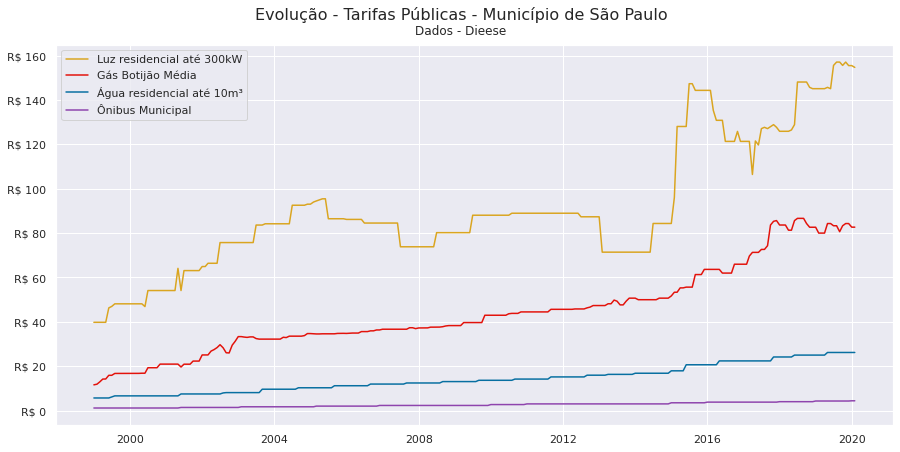

In [182]:
matplotlib.rcParams['figure.figsize'] = (15,7)
fig, (ax1) = plt.subplots(1, sharex=True)
plt.text(x=0.5, y=0.93, s="Evolução - Tarifas Públicas - Município de São Paulo", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.90, s="Dados - Dieese", fontsize=12, ha="center", transform=fig.transFigure)

ax1.plot(tarifas_publicas['Luz residencial até 300kW'], color='#DAA520')
ax1.plot(tarifas_publicas['Gás Botijão Média'], color='#E3120B')
ax1.plot(tarifas_publicas['Água residencial até 10mt3'], color='#076FA1')
ax1.plot(tarifas_publicas['Ônibus Municipal'], color='#8E44AD')
ax1.legend(['Luz residencial até 300kW','Gás Botijão Média','Água residencial até 10m³','Ônibus Municipal'])
fmt = 'R$ {x:,.0f}'

tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
plt.subplots_adjust(hspace=.05)
plt.show()

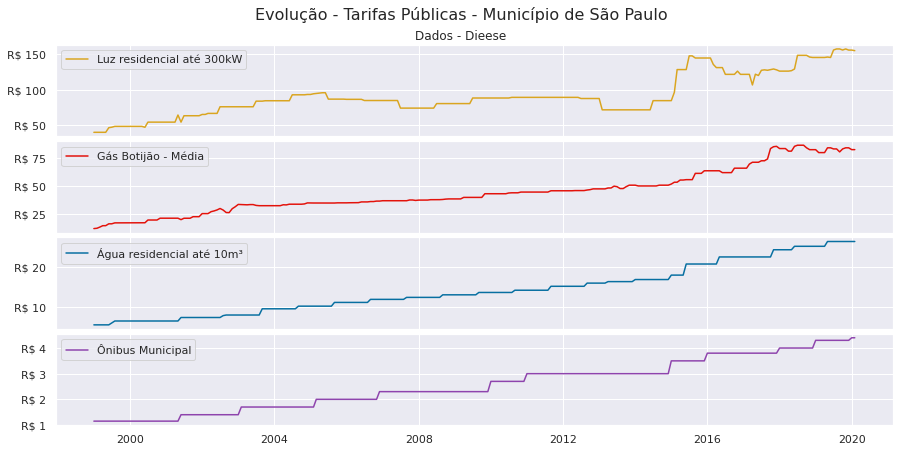

In [183]:
matplotlib.rcParams['figure.figsize'] = (15,7)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True)
plt.text(x=0.5, y=0.93, s="Evolução - Tarifas Públicas - Município de São Paulo", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.89, s="Dados - Dieese", fontsize=12, ha="center", transform=fig.transFigure)

ax1.plot(tarifas_publicas['Luz residencial até 300kW'], color='#DAA520')
ax2.plot(tarifas_publicas['Gás Botijão Média'], color='#E3120B')
ax3.plot(tarifas_publicas['Água residencial até 10mt3'], color='#076FA1')
ax4.plot(tarifas_publicas['Ônibus Municipal'], color='#8E44AD')
ax1.legend(['Luz residencial até 300kW'])
ax2.legend(['Gás Botijão - Média'])
ax3.legend(['Água residencial até 10m³'])
ax4.legend(['Ônibus Municipal'])

fmt = 'R$ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
ax2.yaxis.set_major_formatter(tick)
ax3.yaxis.set_major_formatter(tick)
ax4.yaxis.set_major_formatter(tick)
plt.subplots_adjust(hspace=.05)
plt.show()

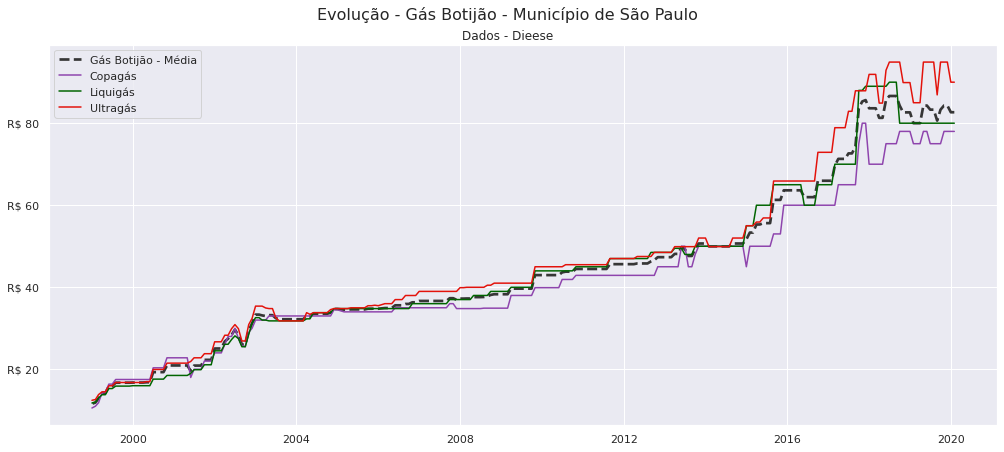

In [184]:
matplotlib.rcParams['figure.figsize'] = (17,7)
fig, (ax1) = plt.subplots(1, sharex=True)
plt.text(x=0.5, y=0.93, s="Evolução - Gás Botijão - Município de São Paulo", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.89, s="Dados - Dieese", fontsize=12, ha="center", transform=fig.transFigure)

ax1.plot(tarifas_publicas['Gás Botijão Média'], color='#363636', linewidth=2.7, linestyle='--')
ax1.plot(tarifas_publicas['Copagás'], color='#8E44AD')
ax1.plot(tarifas_publicas['Liquigás'], color='#006400')
ax1.plot(tarifas_publicas['Ultragás'], color='#E3120B')
ax1.legend(['Gás Botijão - Média','Copagás','Liquigás','Ultragás'])

fmt = 'R$ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
ax2.yaxis.set_major_formatter(tick)
plt.show()